## Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('50_Startups.csv')

In [4]:
# Check the shape of data
df.shape

(50, 5)

There are 50 rows and 5 columns present in this dataset.

In [5]:
# Take a look of dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.rename(columns={'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},inplace=True)

In [7]:
# Take a look of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


we have numerical columns 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit' and one column 'State' dtype is object.

In [8]:
# Take a look of five number
df.describe()

,RDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
# Let's check for duplicates
df.duplicated().sum()

0

There is no duplicate row present in this dataset

In [10]:
# Let's check for null values
df.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

There is no null values are present in this dataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Let's explore 'R&D Spend' column

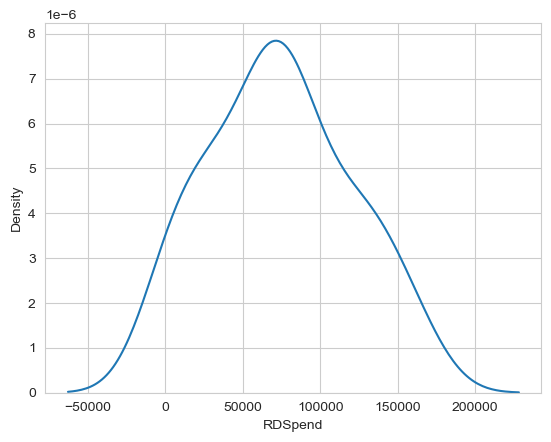

In [12]:
sns.kdeplot(df['RDSpend'])
plt.show()

**The distribution of 'R&D Spend' looks like normally distributed**

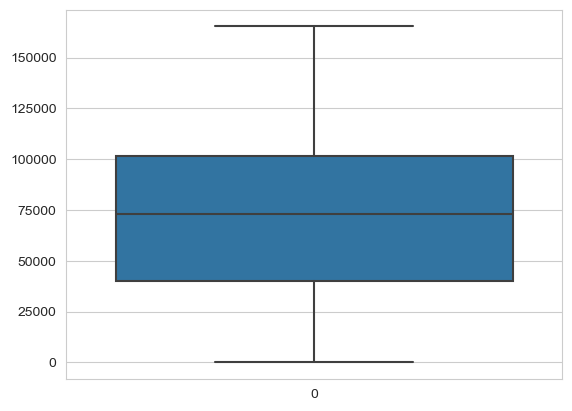

In [13]:
# Let's check outliers
sns.boxplot(df['RDSpend'])
plt.show()

Almost outlier free 'R&D Spend' column and this is good for our model.

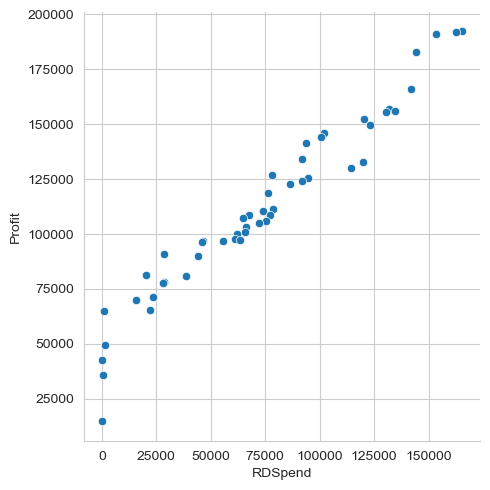

In [14]:
sns.relplot(x='RDSpend',y='Profit',kind='scatter',data=df)
plt.show()

* R&D Spend column is positively correlated with our target variable
* As R&D Spend increases our target variable is also increases.

### Let's explore 'Administration' column

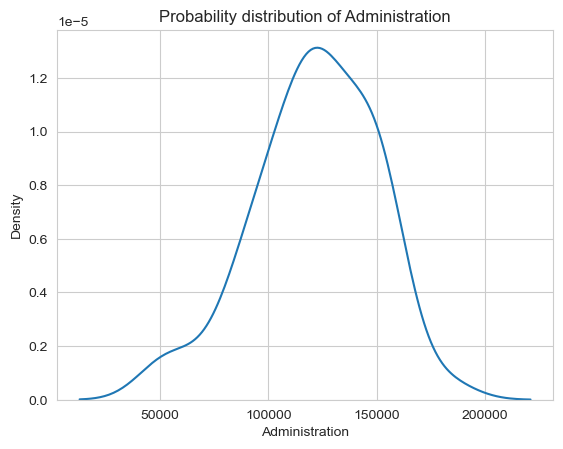

In [15]:
sns.kdeplot(df['Administration'])
plt.title('Probability distribution of Administration')
plt.show()

Almost normally distributed our Administration column that is good for our model

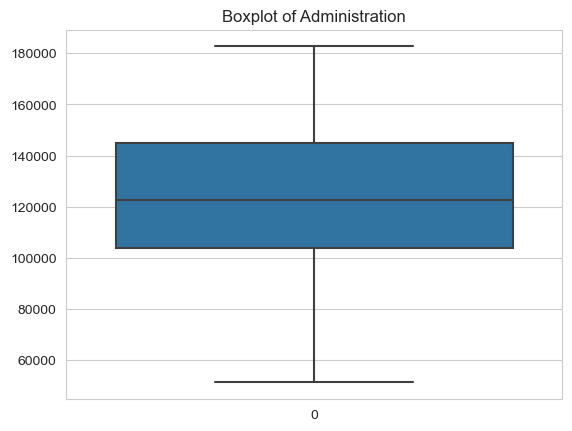

In [16]:
sns.boxplot(df['Administration'])
plt.title('Boxplot of Administration')
plt.show()

**We can see on above box plot there is no outliers or extreme points present in Administration column.**

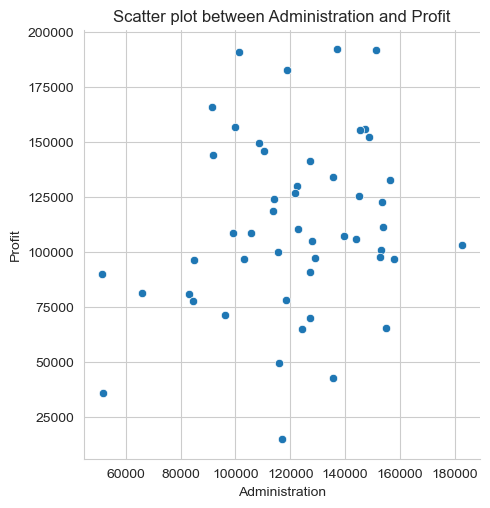

In [17]:
sns.relplot(x='Administration',y='Profit',kind='scatter',data=df)
plt.title('Scatter plot between Administration and Profit')
plt.show()

**We can see there is no linear relationship between Administration and Profit so it is not more usefule column.**

### Let's explore Marketing Spend column

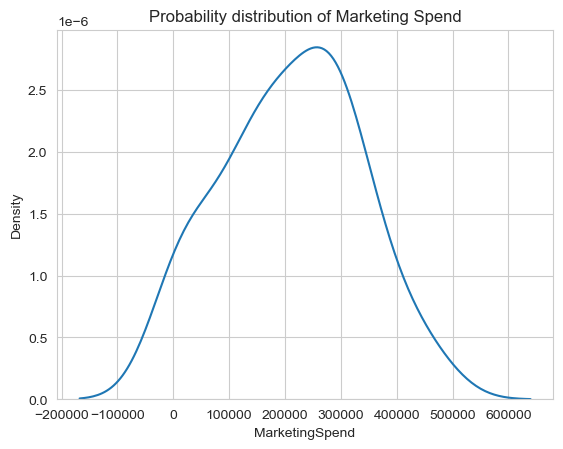

In [18]:
sns.kdeplot(df['MarketingSpend'])
plt.title('Probability distribution of Marketing Spend')
plt.show()

**Almost normally distributed but not fully.**

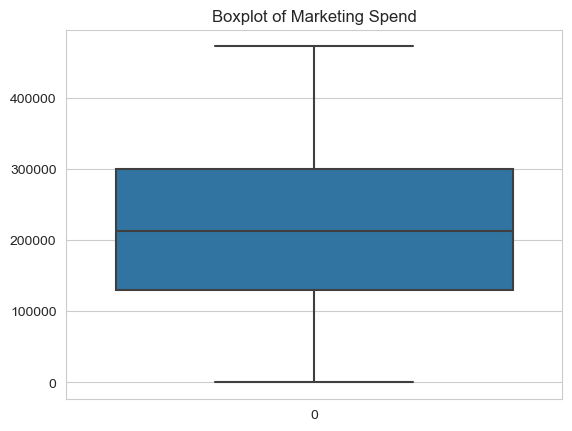

In [19]:
sns.boxplot(df['MarketingSpend'])
plt.title('Boxplot of Marketing Spend')
plt.show()

**Also there is no outliers or extreme points are present in MarketingSpend column**

### Let's explore State column

In [20]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

Almost equal number of data present in all states

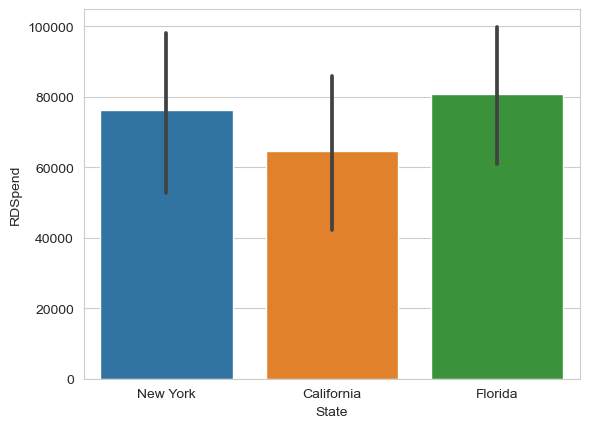

In [21]:
sns.barplot(x='State', y='RDSpend', data=df)
plt.show()

* Florida have maximum R&D Spend where as California have least R&D Spend

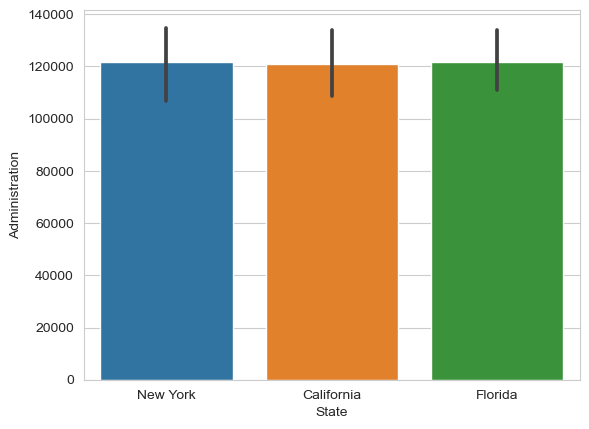

In [22]:
sns.barplot(x='State',y='Administration',data=df)
plt.show()

* Administration is almost equal for all states

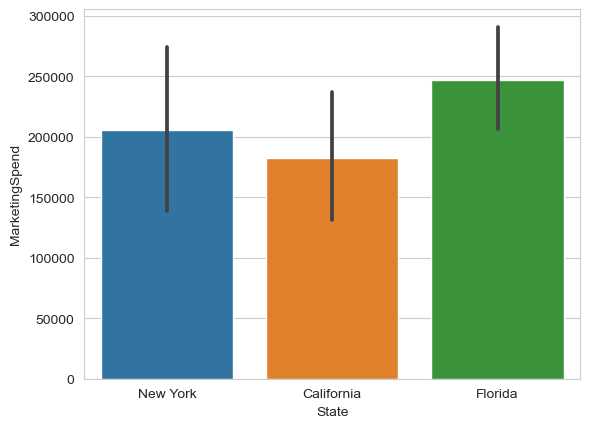

In [23]:
sns.barplot(x='State', y='MarketingSpend', data=df)
plt.show()

* Florida have maximum Marketing Spend
* New york have second maximum Marketing Spend 
* California have least Marketing Spend

### Let's train the model

In [24]:
model1 = sm.ols('Profit ~ RDSpend + Administration + MarketingSpend + State',data=df).fit()

In [25]:
result1 = model1.summary()

In [26]:
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        15:34:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RDSpend               0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend        0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
r2_score1 = model1.rsquared
r2_score1

0.9507524843355148

## Let's imporve the model

In [28]:
df.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


* RDSpend and Marketing Spend is highly correlated with each other we have to drop one column to improve model accuracy.
* RDSpend is highly correlated with Profit which is good for our model.

### Let's calculate VIF

In [29]:
res_1 = sm.ols('RDSpend ~ Administration + MarketingSpend', data=df).fit().rsquared
vif1 = 1/(1-res_1)

res_2 = sm.ols('Administration ~ RDSpend+ MarketingSpend', data=df).fit().rsquared
vif2 = 1/(1-res_2)

res_3 = sm.ols('MarketingSpend ~ RDSpend + Administration', data=df).fit().rsquared
vif3 = 1/(1-res_3)

In [30]:
pd.DataFrame(data=[vif1,vif2,vif3],columns=['VIF'],index=['RDSpend','Administration','MarketingSpend'])

,VIF
RDSpend,2.468903
Administration,1.175091
MarketingSpend,2.326773


### Let's use simple linear regression model to know which variable is more important

In [31]:
# Check for RDSpend model
RDSpend_model = sm.ols('Profit ~ RDSpend', data=df).fit()
RDSpend_model.rsquared

0.9465353160804392

In [32]:
# Check for Administration column
adm_model = sm.ols('Profit ~ Administration', data=df).fit()
adm_model.rsquared

0.04028714077757245

In [33]:
# Chcek for MarketingSpend
mar_model = sm.ols('Profit ~ MarketingSpend', data=df).fit()
mar_model.rsquared

0.5591535746115515

In [34]:
state_model = sm.ols('Profit ~ State', data=df).fit()
state_model.rsquared

0.023875218249123753

In [35]:
pd.DataFrame([RDSpend_model.rsquared, adm_model.rsquared, mar_model.rsquared,state_model.rsquared],
             columns=['RSquared Value'],
             index=['RDSpend', 'Administration', 'MarketingSpend','State'])

,RSquared Value
RDSpend,0.946535
Administration,0.040287
MarketingSpend,0.559154
State,0.023875


**'RDSpend' is most importnat column with respect to others columns
and 'Administration' column is just 4%, almost nothing contributing to explain target variable and same for 'State' column**

### Let's calculate cooks distance

In [36]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

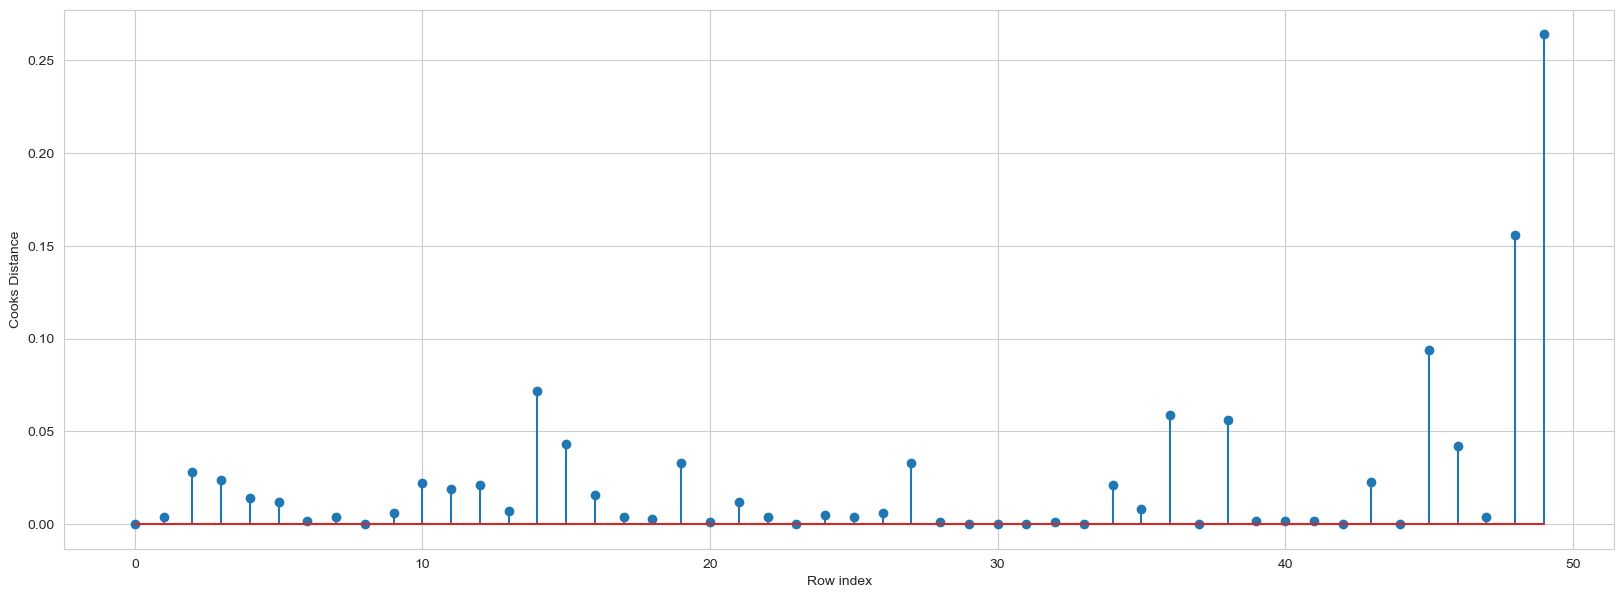

In [37]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

**We can see in above plot there is no cooks dstance values greater than 1 so, there is no influencial point, there is no need to remove any point**

### Residuals vs Regressor

In [38]:
import statsmodels.api as smm

eval_env: 1


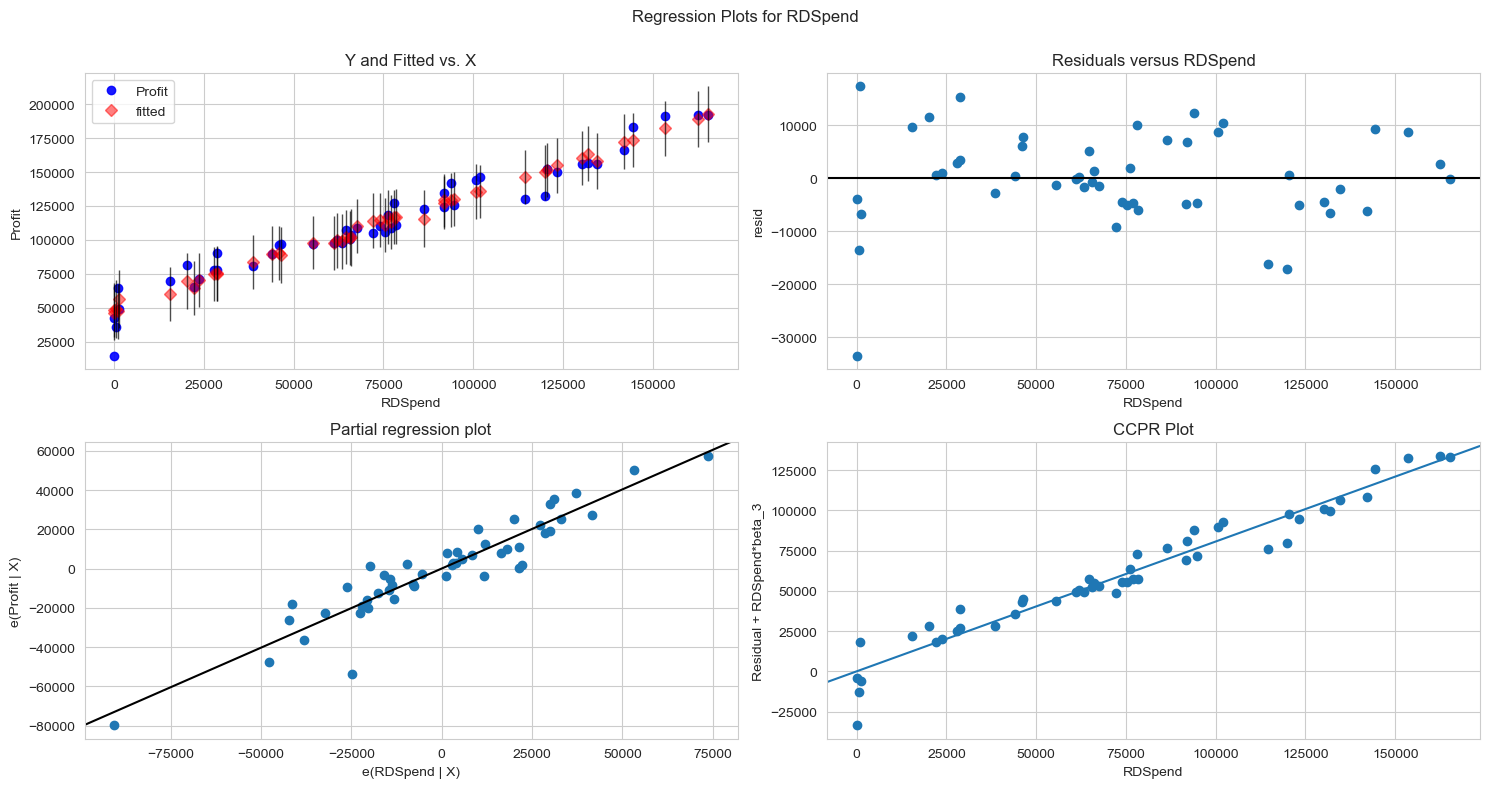

In [39]:
fig = plt.figure(figsize=(15,8))
fig = smm.graphics.plot_regress_exog(model1, "RDSpend", fig=fig)
plt.show()

* 'RDSpend' column contributing more to predict the actual Profit because Partial regression plot is more inclined
* We can also see the actual and predicted points are so close to each other that means our model perform well.

eval_env: 1


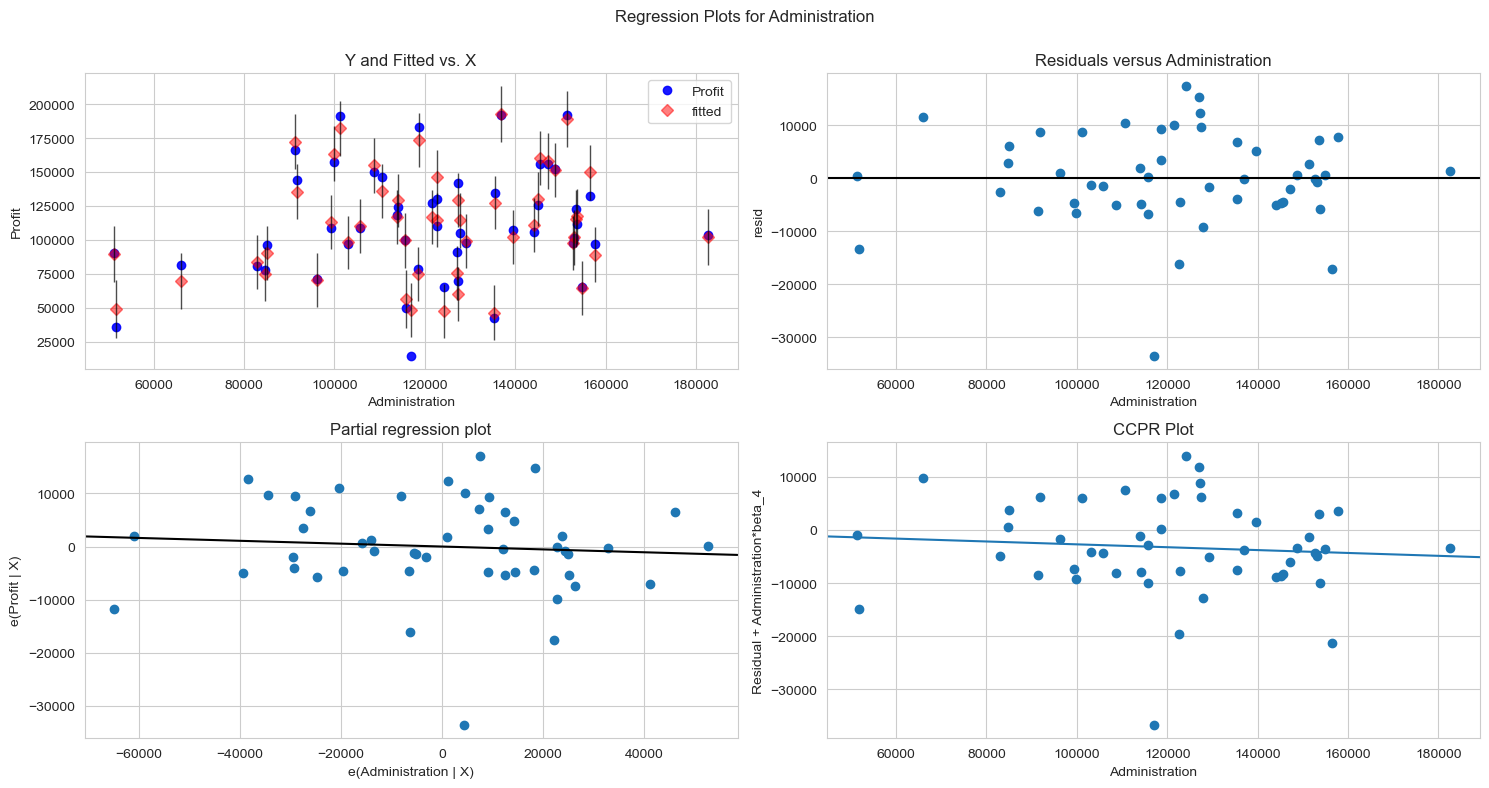

In [40]:
fig = plt.figure(figsize=(15,8))
fig = smm.graphics.plot_regress_exog(model1, "Administration", fig=fig)
plt.show()

* We can see there is more randomness in 'Administration' column thats why it is not useful column.
* In regression plot of 'Administration' column there is slitly inclination we found that means it's contribution to predict the profit is very less on compare with 'RDSpend'

eval_env: 1


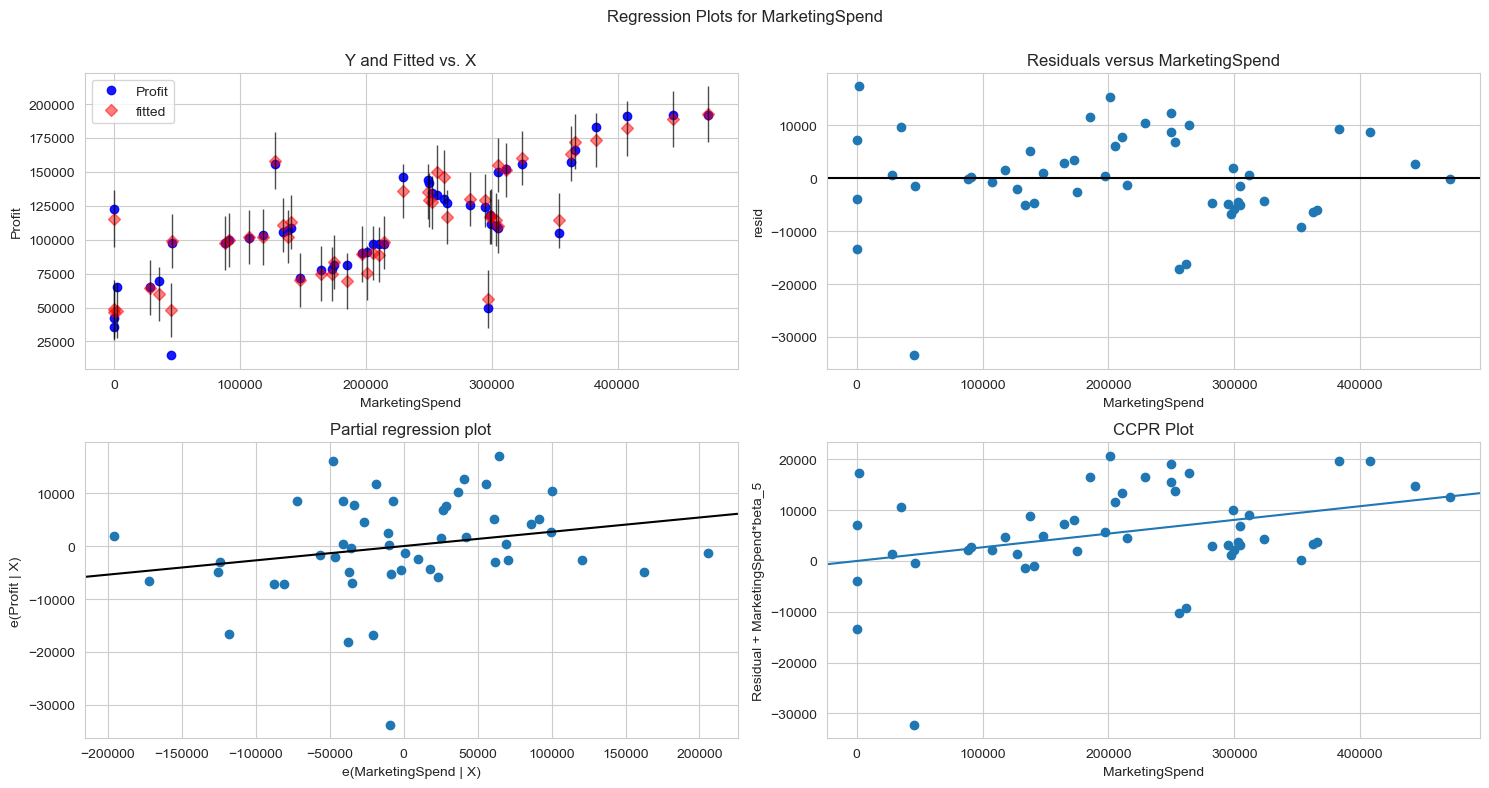

In [41]:
fig = plt.figure(figsize=(15,8))
fig = smm.graphics.plot_regress_exog(model1, "MarketingSpend", fig=fig)
plt.show()

* We can see the partial regression plot of 'MarketingSpend' column is more than 'Administration' column but less than 'RDSpend' column it's contribution to predict profit is more on compare with 'Administration' and less than 'RDSpend'

# Let's Build LinearRegression model from sklearn

In [42]:
x = df.drop(columns=['Profit'])
y = df['Profit']

In [43]:
x[:3]

,RDSpend,Administration,MarketingSpend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida


In [44]:
y[:3]

0    192261.83
1    191792.06
2    191050.39
Name: Profit, dtype: float64

In [45]:
df1 = pd.get_dummies(df, drop_first=True)

In [46]:
df1.head()

,RDSpend,Administration,MarketingSpend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [47]:
# Let's split the data into train and test set
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop(columns=['Profit']),df1['Profit'], test_size=0.2, random_state=42)

In [49]:
X_train[:3]

,RDSpend,Administration,MarketingSpend,State_Florida,State_New York
12,93863.75,127320.38,249839.44,1,0
4,142107.34,91391.77,366168.42,1,0
37,44069.95,51283.14,197029.42,0,0


In [50]:
Y_train[:3]

12    141585.52
4     166187.94
37     89949.14
Name: Profit, dtype: float64

In [51]:
# Let's build the model
from sklearn.linear_model import LinearRegression

In [52]:
model_2 = LinearRegression()

In [53]:
model_2.fit(X_train,Y_train)

LinearRegression()

In [54]:
train_pred_2 = model_2.predict(X_train)
test_pred_2 = model_2.predict(X_test)

In [55]:
# Let's check the model performance
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
train_mse = mean_squared_error(Y_train, train_pred_2)
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(Y_test, test_pred_2)
test_rmse = np.sqrt(test_mse)

In [57]:
train_mse, test_mse, train_rmse, test_rmse

(79700060.08259316, 82010363.04430102, 8927.489013300054, 9055.957323458466)

**Since model approximately make same error on training data as well as on test data so, our model is not overfitting**

In [58]:
# Let's calculate r2_score
r2_score2 = r2_score(Y_test, test_pred_2)
r2_score2

0.8987266414328637

### Let's apply some transformations

### 1. square root

In [59]:
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)
Y_train_sqrt = np.sqrt(Y_train)
Y_test_sqrt = np.sqrt(Y_test)

In [60]:
X_train_sqrt[:2]

,RDSpend,Administration,MarketingSpend,State_Florida,State_New York
12,306.371915,356.819814,499.839414,1.0,0.0
4,376.971272,302.310718,605.118517,1.0,0.0


In [61]:
X_train_sqrt[:3]

,RDSpend,Administration,MarketingSpend,State_Florida,State_New York
12,306.371915,356.819814,499.839414,1.0,0.0
4,376.971272,302.310718,605.118517,1.0,0.0
37,209.928440,226.457811,443.879961,0.0,0.0


In [62]:
model_3 = LinearRegression()

In [63]:
model_3.fit(X_train_sqrt, Y_train_sqrt)

LinearRegression()

In [64]:
test_pred_3 = model_3.predict(X_test_sqrt)

In [65]:
test_rmse_3 = np.sqrt(mean_squared_error(Y_test_sqrt, test_pred_3))
test_rmse_3

23.585961368031473

In [66]:
r2_score3 = r2_score(Y_test_sqrt, test_pred_3)
r2_score3

0.7833287458968144

### 2. MinMax Scaler

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
mms = MinMaxScaler()

In [69]:
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

In [70]:
Y_train_mms = mms.fit_transform(pd.DataFrame(Y_train))

In [71]:
Y_test_mms = mms.transform(pd.DataFrame(Y_test))

In [72]:
model_4 = LinearRegression()

In [73]:
model_4.fit(X_train_mms, Y_train_mms)

LinearRegression()

In [74]:
test_pred_4 = model_4.predict(X_test_mms)

In [75]:
test_rmse_4 = np.sqrt(mean_squared_error(Y_test_mms, test_pred_4))
test_rmse_4

0.05099637005889551

In [76]:
r2_score4 = r2_score(Y_test_mms, test_pred_4)
r2_score4

0.8987266414319842

### 3 Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
ss = StandardScaler()

In [79]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [80]:
Y_train_ss = ss.fit_transform(pd.DataFrame(Y_train))
Y_test_ss = ss.transform(pd.DataFrame(Y_test))

In [81]:
X_train_ss[:3]

array([[ 0.34202149,  0.22787678,  0.12425038,  1.36277029, -0.69388867],
       [ 1.36207849, -1.0974737 ,  1.14990688,  1.36277029, -0.69388867],
       [-0.71081297, -2.5770186 , -0.34136825, -0.73379939, -0.69388867]])

In [82]:
Y_train_ss[:3]

array([[ 0.62505458],
       [ 1.21802035],
       [-0.61948176]])

In [83]:
# Let's build the model
model_5 = LinearRegression()

In [84]:
model_5.fit(X_train_ss, Y_train_ss)

LinearRegression()

In [85]:
test_pred_5 = model_5.predict(X_test_ss)

In [86]:
test_rmse_5 = np.sqrt(mean_squared_error(Y_test_ss,test_pred_5))
test_rmse_5

0.21826603559575453

In [87]:
r2_score5 = r2_score(Y_test_ss, test_pred_5)
r2_score5

0.8987266414319839

### 4.Normalization

In [88]:
from sklearn.preprocessing import Normalizer

In [89]:
nor = Normalizer()

In [90]:
X_train_nor = nor.fit_transform(X_train)
X_test_nor = nor.transform(X_test)

In [91]:
Y_train_nor = nor.fit_transform(pd.DataFrame(Y_train))
Y_test_nor = nor.transform(pd.DataFrame(Y_test))

In [92]:
X_train_nor[:3]

array([[3.17425100e-01, 4.30567545e-01, 8.44898156e-01, 3.38176453e-06,
        0.00000000e+00],
       [3.52388047e-01, 2.26627050e-01, 9.07999364e-01, 2.47973150e-06,
        0.00000000e+00],
       [2.11560290e-01, 2.46187617e-01, 9.45850887e-01, 0.00000000e+00,
        0.00000000e+00]])

In [93]:
Y_test_nor[:3]

array([[1.],
       [1.],
       [1.]])

In [94]:
model_6 = LinearRegression()

In [95]:
model_6.fit(X_train_nor, Y_train_nor)

LinearRegression()

In [96]:
test_pred_6 = model_6.predict(X_test_nor)
train_pred_6 = model_6.predict(X_train_nor)

In [97]:
test_rmse_6 = np.sqrt(mean_squared_error(Y_test_nor, test_pred_6))
test_rmse_6

0.0

In [98]:
train_rmse_6 = np.sqrt(mean_squared_error(Y_train_nor, train_pred_6))
train_rmse_6

0.0

In [99]:
r2_score6 = r2_score(Y_test_nor, test_pred_6)
r2_score6

1.0

## Lasso

In [110]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [102]:
lasso = Lasso(alpha=0.5)

In [105]:
lasso.fit(X_train_nor, Y_train_nor)

Lasso(alpha=0.5)

In [107]:
train_pred = lasso.predict(X_train_nor)
test_pred = lasso.predict(X_test_nor)

In [111]:
train_r2_score_lasso = r2_score(Y_train_nor, train_pred)
test_r2_score_lasso = r2_score(Y_test_nor, test_pred)
train_r2_score_lasso, test_r2_score_lasso

(1.0, 1.0)

In [112]:
n = len(df)
p = len(df.columns)-1
n, p

(50, 4)

In [113]:
train_adj_r2_lasso = 1 - (1 - train_r2_score_lasso) * ((n - 1)/(n - p - 1))
test_adj_r2_lasso = 1 - (1 - test_r2_score_lasso) * ((n - 1)/(n - p - 1))
train_adj_r2_lasso, test_adj_r2_lasso

(1.0, 1.0)

## Ridge

In [114]:
from sklearn.linear_model import Ridge

In [115]:
ridge = Ridge(alpha=0.5)

In [116]:
ridge.fit(X_train_nor,Y_train_nor)

Ridge(alpha=0.5)

In [117]:
train_pred = ridge.predict(X_train_nor)
test_pred = ridge.predict(X_test_nor)

In [118]:
train_r2_score_ridge = r2_score(Y_train_nor, train_pred)
test_r2_score_ridge = r2_score(Y_test_nor, test_pred)
train_r2_score_ridge, test_r2_score_ridge

(1.0, 1.0)

In [119]:
train_adj_r2_ridge = 1 - (1 - train_r2_score_ridge) * ((n - 1)/(n - p - 1))
test_adj_r2_ridge = 1 - (1 - test_r2_score_ridge) * ((n - 1)/(n - p - 1))
train_adj_r2_ridge, test_adj_r2_ridge

(1.0, 1.0)

## ElasticNet

In [120]:
from sklearn.linear_model import ElasticNet

In [121]:
els = ElasticNet()

In [128]:
els.fit(X_train_nor, Y_train_nor)

ElasticNet()

In [129]:
train_pred = els.predict(X_train_nor)
test_pred = els.predict(X_test_nor)

In [130]:
train_r2_score_els = r2_score(Y_train_nor, train_pred)
test_r2_score_els = r2_score(Y_test_nor, test_pred)
train_r2_score_els, test_r2_score_els

(1.0, 1.0)

# Conclusion

**I applied different transformations and fit the model**

* When I applied square root transform then the root mean square erro is 312 and r2_score is 0.783
* When I applied MinMaxScaler transformation then I found rmse is 1.066 and r2_score is 0.89
* smiliarly when apllied Standard Scaler then I found rmse is 0.218 and r2_score 0.89
* When I applied Normilazer then I got train_rmse = 0, test_rmse = 0 and r2_score = 1

* In all four transformation Normalizer gives best result.
* So, I fit the normalised data in all remaining models and all model gives 100% accurate result.